## Import Libraries 

In [1]:
import pandas as pd  # data processing ,CSV file I/O
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import statsmodels.tsa.api as smt  
import requests
import io
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/DEEPAK KUMAR/Desktop/Python Project/weatherAUS/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)

In [7]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


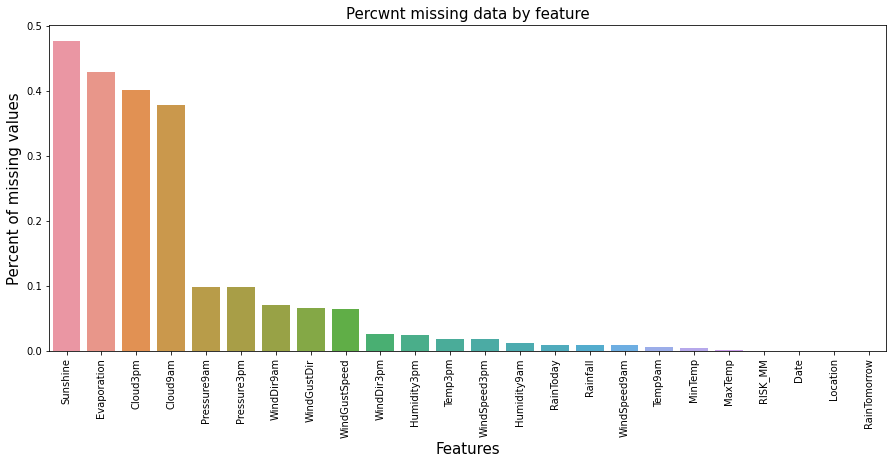

In [8]:
f,ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x = missing_data.index,y = missing_data['Percent'])
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title("Percwnt missing data by feature",fontsize = 15)
missing_data

The above bar graph gives the missing value percentage for each features.
so droping 'Sunshine','Evaporation','Cloud3pm','Cloud9am'
, Date and Location (since it is only for australia so not required)

In [9]:
df = df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am','Date','Location','RISK_MM'],axis = 1)

In [10]:
"""“RainToday” and “RainTomorrow” are objects (Yes / No). I will convert them to binary (1/0) for our convenience."""

'“RainToday” and “RainTomorrow” are objects (Yes / No). I will convert them to binary (1/0) for our convenience.'

In [11]:
df['RainToday'] = df['RainToday'].map({'No':0,'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0,'Yes':1})

In [12]:
df = df.dropna(how = 'any')  # also able to fill nan values using mean,median

In [13]:
df['WindDir9am']=df['WindDir9am'].map({'W':0, 'NNW':1, 'SE':2, 'ENE':3, 'SW':4, 'SSE':5, 'S':6, 'NE':7, 'SSW':8, 'N':9, 'WSW':10,
       'ESE':11, 'E':12, 'NW':13, 'WNW':14,
       'NNE':15
})

In [14]:
df['WindDir3pm']=df['WindDir3pm'].map({'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9,
       'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14,
        'NE':15})

In [15]:
df['WindGustDir']=df['WindGustDir'].map({'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9,
       'S':10, 'NW':11, 'SE':12, 'ESE':13, 
       'E':14, 'SSW':15})

In [16]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [17]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Base Model with Logistic

In [18]:
y  = df["RainTomorrow"]
X = df.drop("RainTomorrow",axis=1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [21]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,1.0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,1.0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,1.0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,1.0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [22]:
cols=df_constant.columns[:-1]
model=sm.Logit(df.RainTomorrow,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.352697
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               112925
Model:                          Logit   Df Residuals:                   112908
Method:                           MLE   Df Model:                           16
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.3331
Time:                        22:17:13   Log-Likelihood:                -39828.
converged:                       True   LL-Null:                       -59722.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            55.7187      1.644     33.893      0.000      52.497      58.941
MinTemp           0.0247      0.005      5.241      0.000       0.015       0.034
MaxTemp           0.0031      0.008      0.397      0.691      -0.012       0.019
Rainfall          0.0079      0.001      6.698      0.000       0.006       0.010
WindGustDir      -0.0062      0.002     -3.086      0.002      -0.010      -0.002
WindGustSpeed     0.0645      0.001     60.238      0.000       0.062       0.067
WindDir9am        0.0073      0.002      3.718      0.000       0.003       0.011
WindDir3pm       -0.0163      0.002     -8.051      0.000      -0.020      -0.012
WindSpeed9am     -0.0105      0.001     -7.354      0.000      -0.013      -0.008
WindSpeed3pm     -0.0429      0.001    -29.603      0.000      -0.046      -0.040
Humidity9am       0.0048      0.001      4.618      0.000       0.003       0.007
Humidity3pm       0.0648      0.001     58.984      0.000       0.063       0.067
Pressure9am       0.1689      0.005     31.487      0.000       0.158       0.179
Pressure3pm      -0.2307      0.005    -42.672      0.000      -0.241      -0.220
Temp9am           0.0004      0.007      0.061      0.952      -0.014       0.015
Temp3pm          -0.0436      0.009     -4.902      0.000      -0.061      -0.026
RainToday         0.5307      0.024     22.015      0.000       0.483       0.578
=================================================================================
"""

In [23]:
df['RainTomorrow'].value_counts(normalize=True)


0    0.778446
1    0.221554
Name: RainTomorrow, dtype: float64

In [24]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report

In [25]:
def imb_predict(algo,xtrain,ytrain,xtest,ytest):
    
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    yprob=algo.predict_proba(xtest)[:,1]
    
    acc=accuracy_score(ytest,ypred)
    print('Accuracy Score: ',acc)
    
    con = confusion_matrix(ytest,ypred)
    print('Confusion matrix: \n',con)
    
    auc=roc_auc_score(ytest,yprob)
    print('AUC: ',auc)
    
    cr=classification_report(ytest,ypred)
    print('Classification report:\n ',cr)
    
    fpr,tpr,thresh=roc_curve(ytest,yprob)
    plt.plot(fpr,tpr,'b--')
    plt.plot(fpr,fpr,'r--')
    plt.show()  

In [26]:
## Logistic Regression

Accuracy Score:  0.8478363539760316
Confusion matrix: 
 [[24994  1346]
 [ 3809  3729]]
AUC:  0.8630236817839977
Classification report:
                precision    recall  f1-score   support

           0       0.87      0.95      0.91     26340
           1       0.73      0.49      0.59      7538

    accuracy                           0.85     33878
   macro avg       0.80      0.72      0.75     33878
weighted avg       0.84      0.85      0.84     33878



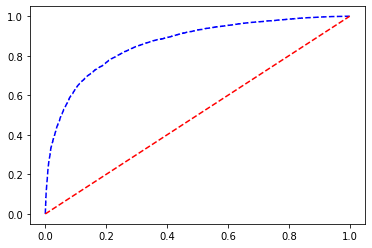

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

imb_predict(lr,X_train,y_train,X_test,y_test)

## K- NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

imb_predict(knn,X_train,y_train,X_test,y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier      
dtree=DecisionTreeClassifier(max_depth=5)
imb_predict(dtree,X_train,y_train, X_test,y_test)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=20)
imb_predict(rf,X_train,y_train, X_test,y_test)

## Now performing undersampling

In [ ]:
Xy_train=pd.concat([X_train,y_train],axis=1)                         ##unsersampling
Xy_train0=Xy_train[Xy_train['RainTomorrow']==0]
Xy_train1=Xy_train[Xy_train['RainTomorrow']==1]
len1=len(Xy_train1)
len0=len(Xy_train0)
Xy_train0_us=Xy_train0.sample(n=len1)
Xy_train_us=pd.concat([Xy_train1,Xy_train0_us],axis=0)

X_train_us=Xy_train_us.drop('RainTomorrow',axis=1)
y_train_us=Xy_train_us['RainTomorrow']

## Logistic Regression

In [ ]:
imb_predict(lr,X_train_us,y_train_us, X_test,y_test)

In [ ]:
## KNN Classifier

In [ ]:
imb_predict(knn,X_train_us,y_train_us, X_test,y_test) 


## Decision Tree Classifier

In [ ]:
imb_predict(dtree,X_train_us,y_train_us, X_test,y_test) 


## Random Forest Classifier

In [ ]:
imb_predict(rf,X_train_us,y_train_us, X_test,y_test) 

## Over sampling

In [ ]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train0=Xy_train[Xy_train['RainTomorrow']==0]                     ##oversampling
Xy_train1=Xy_train[Xy_train['RainTomorrow']==1]
len1=len(Xy_train1)
len0=len(Xy_train0)
Xy_train1_os=Xy_train1.sample(n=len0,replace=True)
Xy_train_os=pd.concat([Xy_train0,Xy_train1_os],axis=0)

X_train_os=Xy_train_os.drop('RainTomorrow',axis=1)
y_train_os=Xy_train_os['RainTomorrow']

## Logistic Regression

In [ ]:
imb_predict(lr,X_train_os,y_train_os, X_test,y_test)


## KNN Classifier

In [ ]:
imb_predict(knn,X_train_os,y_train_os, X_test,y_test)

## Decision Tree Classifier

In [ ]:
imb_predict(dtree,X_train_os,y_train_os, X_test,y_test) 

## Random Forest Classifier

In [ ]:
imb_predict(rf,X_train_os,y_train_os, X_test,y_test)  


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

## Logistic Regression

In [ ]:
imb_predict(lr,X_train_sm,y_train_sm, X_test,y_test)    


## KNN Classifier

In [ ]:
imb_predict(knn,X_train_sm,y_train_sm, X_test,y_test) 


## Decision Tree Classifier

In [ ]:
imb_predict(dtree,X_train_sm,y_train_sm, X_test,y_test)

## Random Forest Classifier

In [ ]:
imb_predict(rf,X_train_sm,y_train_sm, X_test,y_test) 
